[1 webinar](https://github.com/ranaroussi/futuresio-webinars/blob/master/01-prototyping-trading-strategies.ipynb
)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
# import mplfinance as mpf # https://github.com/matplotlib/mplfinance
from matplotlib import gridspec

# set default plotting size
import matplotlib.pylab
matplotlib.pylab.rcParams['figure.figsize'] = (12, 7)

# helper function for candlestick plotting
import matplotlib.dates as mdates
try:
    from mpf import candlestick_ohlc
except ImportError:
    #     from matplotlib.finance import candlestick_ohlc
    pass

def plot_candlestick(df, ax=None, fmt="%Y-%m-%d", cols=["open", "high", "low", "close"]):
    if ax is None:
        fig, ax = plt.subplots()
        
    idx_name = df.index.name
    dat = df.reset_index()[[idx_name]+cols]
    dat[df.index.name] = dat[df.index.name].map(mdates.date2num)
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter(fmt))
    plt.xticks(rotation=45)
    _ = candlestick_ohlc(ax, dat.values, width=.6, colorup='g', alpha =1)
    ax.set_xlabel(idx_name)
    ax.set_ylabel("Price")
    return ax

In [2]:
# https://github.com/ranaroussi/futuresio-webinars/blob/master/01-prototyping-trading-strategies.ipynb
t = yf.Ticker('SPY')
spy = t.history(start="2000-01-01", auto_adjust=True)
spy = spy.drop(['Dividends', 'Stock Splits'], axis=1)
spy.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,100.044041,100.044041,97.091645,98.146072,8164300
2000-01-04,96.859698,97.218203,94.234173,94.307983,8089800
2000-01-05,94.434507,95.510023,92.620893,94.476685,12177900
2000-01-06,94.223649,95.488962,92.958336,92.958336,6227200
2000-01-07,94.687580,98.356987,94.518871,98.356987,8066500


In [16]:
spy.to_csv('~/Desktop/trading/sp500.csv')

In [3]:
spy.shape

(5319, 5)

In [3]:
spy['Return'] = spy['Close'].pct_change()
returns = spy['Return']
returns.describe()

count    5318.000000
mean        0.000337
std         0.012513
min        -0.109424
25%        -0.004598
50%         0.000680
75%         0.005927
max         0.145198
Name: Return, dtype: float64

In [39]:
# how often it returned > 5% a day?
spy[returns > .005]['Return'].describe()

count    1516.000000
mean        0.012799
std         0.010107
min         0.005003
25%         0.006948
50%         0.009912
75%         0.014607
max         0.145198
Name: Return, dtype: float64

<AxesSubplot:xlabel='Date'>

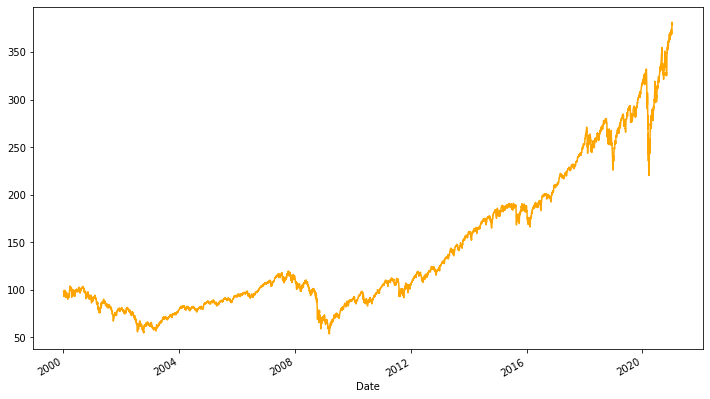

In [51]:
spy['Close'].plot(color='orange')

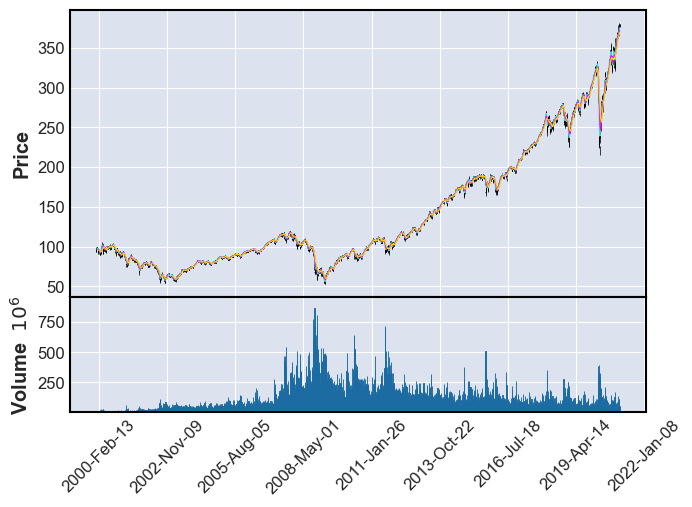

In [112]:
# type='ohlc' renko' 'line' 'candle' 'pnf'
# mav = moving averages
# https://github.com/matplotlib/mplfinance
mpf.plot(spy, type='ohlc', mav=(10, 20, 30), volume=True, show_nontrading=True)

2021-01-07


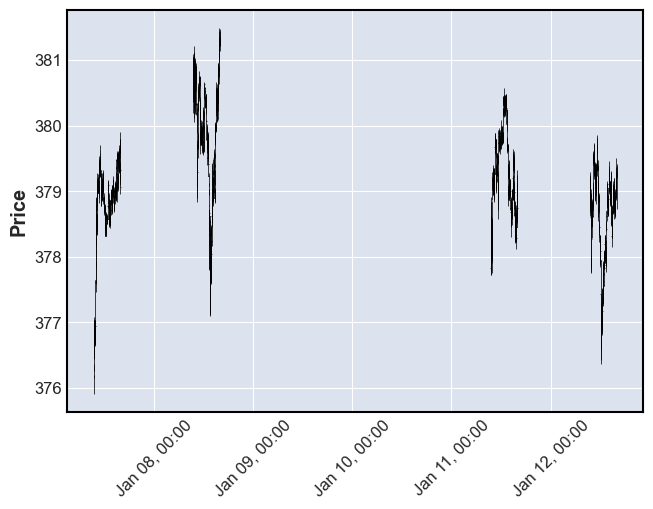

In [111]:
# intraday for the past 6 days
from datetime import datetime, timedelta
start = (datetime.now() - timedelta(6)).strftime('20%y-%m-%d')

print(start)
intra = t.history(start=start, interval = "1m")
# print(intra.shape)
# intra.head()
# intra.tail()
d = intra.loc['2021-01-07':'2021-01-12']
mpf.plot(d, show_nontrading=True)

<AxesSubplot:ylabel='Frequency'>

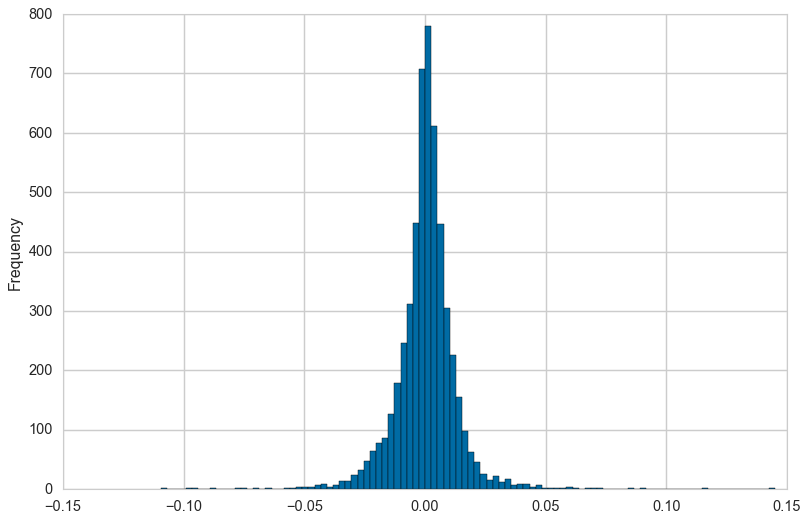

In [153]:
# https://matplotlib.org/3.3.3/tutorials/introductory/customizing.html
plt.style.use(
    'tableau-colorblind10'
)
ok = [
    'Solarize_Light2',
    'ggplot',
    'seaborn',
    'seaborn-colorblind',
    'seaborn-dark',
    'seaborn-dark-palette',
    'seaborn-darkgrid',
    'seaborn-deep',
    'seaborn-ticks',
    'seaborn-whitegrid',
    'tableau-colorblind10'
]
returns.plot.hist(bins=100)

In [159]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
returns.resample('A').sum() * 100

Date
2000-12-31    -6.429873
2001-12-31   -10.111412
2002-12-31   -20.833343
2003-12-31    26.199022
2004-12-31    10.784492
2005-12-31     5.246428
2006-12-31    15.209544
2007-12-31     6.277703
2008-12-31   -37.358537
2009-12-31    26.929428
2010-12-31    15.631107
2011-12-31     4.527769
2012-12-31    15.638894
2013-12-31    28.622718
2014-12-31    13.265251
2015-12-31     2.414633
2016-12-31    12.184700
2017-12-31    19.876699
2018-12-31    -3.231725
2019-12-31    27.969367
2020-12-31    22.469183
2021-12-31     1.327746
Freq: A-DEC, Name: Return, dtype: float64

<AxesSubplot:xlabel='Date'>

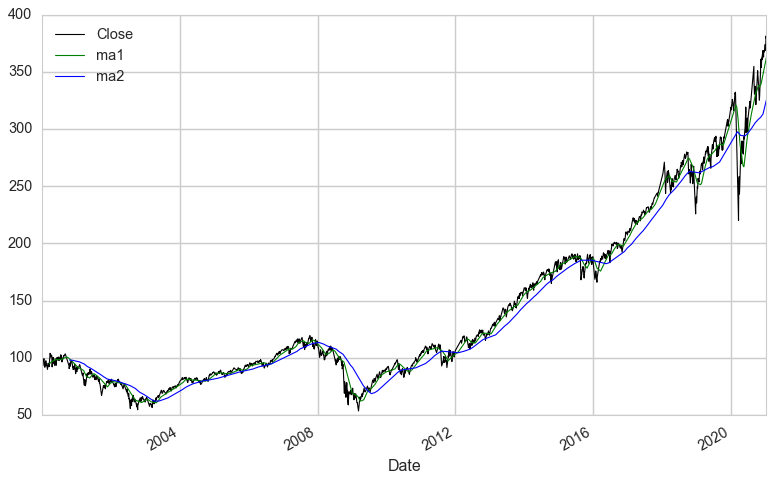

In [176]:
# sma 50 & 200
spy['ma1'] = spy['Close'].rolling(window=50).mean()
spy['ma2'] = spy['Close'].rolling(window=200).mean()
# spy.loc[~np.isnan(spy['ma1'])] # 5242 rows × 9 columns
spy[['Close', 'ma1', 'ma2']].plot(color=['black', 'green', 'blue'], linewidth=1)

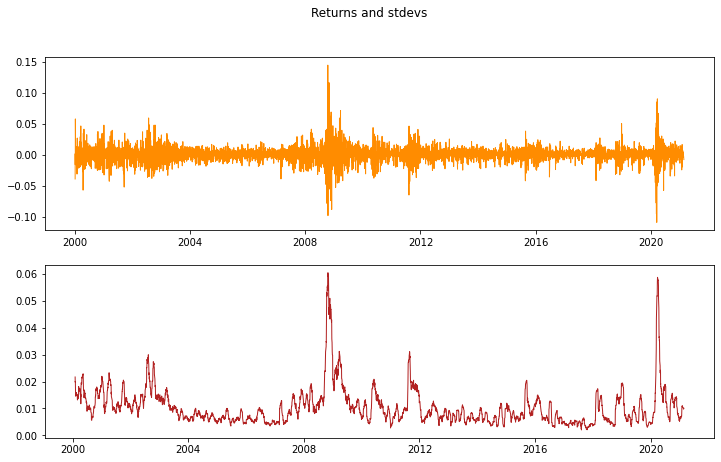

In [5]:
# rolling std
spy['Returns stdevs'] = stdevs = returns.rolling(window=20).std()
# spy['Returns ma20'].plot(linewidth=1, color='firebrick')

fig, axs = plt.subplots(2)
fig.suptitle('Returns and stdevs')
axs[0].plot(returns, linewidth=1, color='darkorange')
axs[1].plot(stdevs, linewidth=1, color='firebrick')

In [189]:
spy[['Return', 'Returns stdevs']].tail()

,Return,Returns stdevs
Date,,
2021-01-06,0.005979,0.006218
2021-01-07,0.014857,0.006958
2021-01-08,0.005698,0.006566
2021-01-11,-0.006741,0.006845
2021-01-12,0.000211,0.006819


In [191]:
spy['Return pct'] = spy['Return'] * 100
spy['Returns stdevs pct'] = spy['Returns stdevs'] * 100
spy[['Return pct', 'Returns stdevs pct']].describe()

,Return pct,Returns stdevs pct
count,5290.000000,5271.000000
mean,0.033386,1.040338
std,1.252926,0.710884
min,-10.942365,0.200985
25%,-0.463089,0.597437
50%,0.067804,0.862681
75%,0.592666,1.273297
max,14.519755,6.042227


**Market volatility**

[post](https://mathbabe.org/2011/07/24/measuring-historical-volatility/)


**Log returns** 

[post](https://mathbabe.org/2011/08/30/why-log-returns/)

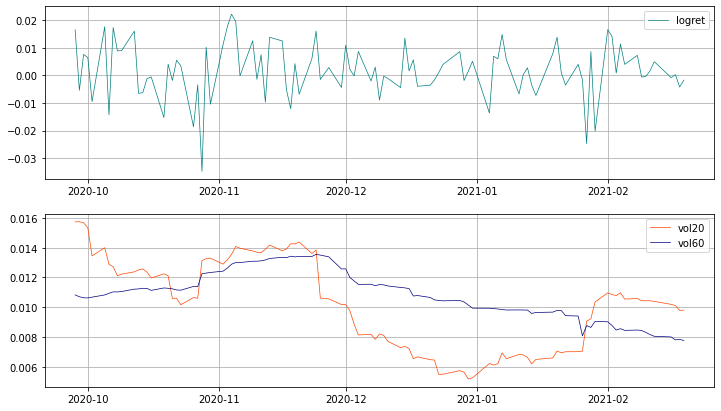

In [17]:
# calculating log returns 
spy['logret'] = logret = np.log(spy['Close'] / spy['Close'].shift(1))

# volatility estimate - 4 weeks
spy['volatility'] = vol = logret.rolling(window=20).std()
spy['volatility60'] = vol60 = logret.rolling(window=60).std()

# plot
fig, axs = plt.subplots(2)
axs[0].plot(logret[-100:], linewidth=.7, color='teal', label='logret')
axs[1].plot(vol[-100:], linewidth=.7, color='orangered', label='vol20')
axs[1].plot(vol60[-100:], linewidth=.7, color='navy', label='vol60')

axs[0].grid(True)
axs[1].grid(True)
# axs[0].spines['top'].set_visible(False)
axs[0].legend()
axs[1].legend()

***Basic Strategy Example***

* BUY ON CLOSE when SPY drops 0.5% (or more)
* SELL ON CLOSE of next day

In [4]:
pf = pd.DataFrame({'spy': spy['Return']}).fillna(0)


In [5]:
pf.tail()

,spy
Date,
2021-02-17,0.000229
2021-02-18,-0.004256
2021-02-19,-0.001766
2021-02-22,-0.007692
2021-02-23,0.001214


In [6]:
# 2,1,0 days ago
pf['2_days_ago'] = pf['spy'].shift(2)  <= -0.005 
pf['yesterday'] = pf['spy'].shift(1)  <= -0.005 
pf['today'] = pf['spy']  <= -0.005 
pf.head(10)

,spy,2_days_ago,yesterday,today
Date,,,,
2000-01-03,0.000000,False,False,False
2000-01-04,-0.039106,False,False,True
2000-01-05,0.001789,False,True,False
2000-01-06,-0.016071,True,False,True
2000-01-07,0.058076,False,True,False
2000-01-10,0.003430,True,False,False
2000-01-11,-0.011966,False,False,True
2000-01-12,-0.009948,False,True,True
2000-01-13,0.013543,True,True,False


In [7]:
# pf['strategy'] = pf['yesterday']['spy'] WON'T WORK!! we need to broadcast
pf['strategy'] = pf[ pf['yesterday'] ]['spy'] 

pf.head(10)

,spy,2_days_ago,yesterday,today,strategy
Date,,,,,
2000-01-03,0.000000,False,False,False,NaN
2000-01-04,-0.039106,False,False,True,NaN
2000-01-05,0.001789,False,True,False,0.001789
2000-01-06,-0.016071,True,False,True,NaN
2000-01-07,0.058076,False,True,False,0.058076
2000-01-10,0.003430,True,False,False,NaN
2000-01-11,-0.011966,False,False,True,NaN
2000-01-12,-0.009948,False,True,True,-0.009948
2000-01-13,0.013543,True,True,False,0.013543


**just scooping up returns from these days**

In [8]:
pf['strategy_ret'] = pf['strategy'].fillna(0).cumsum()
pf.head(10)

,spy,2_days_ago,yesterday,today,strategy,strategy_ret
Date,,,,,,
2000-01-03,0.000000,False,False,False,NaN,0.000000
2000-01-04,-0.039106,False,False,True,NaN,0.000000
2000-01-05,0.001789,False,True,False,0.001789,0.001789
2000-01-06,-0.016071,True,False,True,NaN,0.001789
2000-01-07,0.058076,False,True,False,0.058076,0.059865
2000-01-10,0.003430,True,False,False,NaN,0.059865
2000-01-11,-0.011966,False,False,True,NaN,0.059865
2000-01-12,-0.009948,False,True,True,-0.009948,0.049917
2000-01-13,0.013543,True,True,False,0.013543,0.063460


<AxesSubplot:xlabel='Date'>

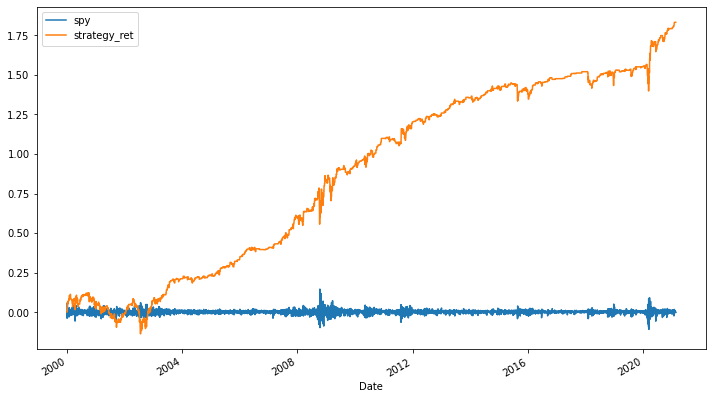

In [68]:
# pf[['spy','strategy_ret']].plot() # is shit, one is pct, the second in cumsum

In [9]:
pf['spy_ret'] = pf['spy'].cumsum()

<AxesSubplot:xlabel='Date'>

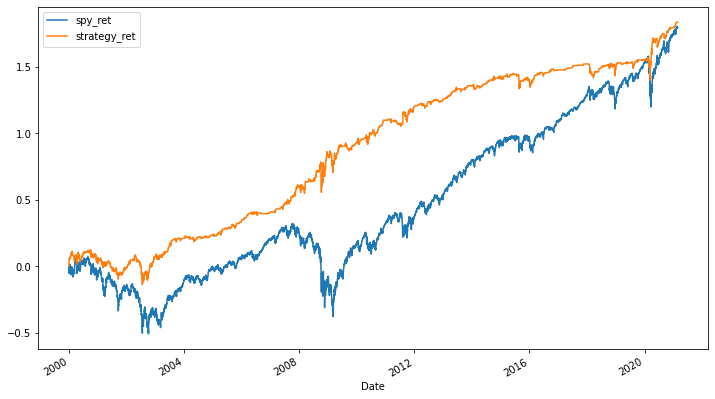

In [10]:
# WOW this really looks much worse in 2021 than in 2016!!
pf[['spy_ret','strategy_ret']].plot()

<AxesSubplot:xlabel='Date'>

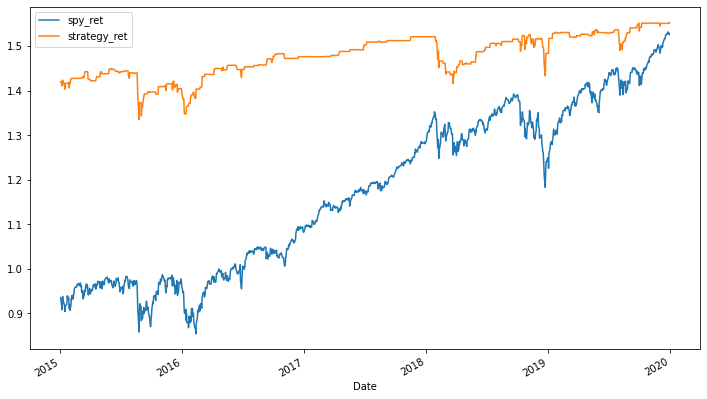

In [26]:
# anyways, the strategy seems to beat SPY
pf.loc["2015-01-01":"2020-01-01", ['spy_ret','strategy_ret']].plot()

## Basic Performance Measuring

**Sharpe Ratio**

"reward-to-variability" ratio

the greater, the better.

![sharpe](https://wikimedia.org/api/rest_v1/media/math/render/svg/d54973db1901fd6f25c55d4bb88fddc75b0fe09f)


**Formula:**
Sharpe(x) = (rX - Rf) / stdev(x)

**Where:**
* X is the investment
* rX is the average rate of the return of X
* Rf is the best available risk-free security (i.e. T-bills)
* StdDev(X) is the standard deviation of rX

In [12]:
# Annualized Sharpe

def sharpe(returns, periods=252, riskfree=0):
    returns = returns.dropna()
    return np.sqrt(periods) * (np.mean(returns-riskfree)) / np.std(returns)

In [13]:
pf.head(10)


,spy,2_days_ago,yesterday,today,strategy,strategy_ret,spy_ret
Date,,,,,,,
2000-01-03,0.000000,False,False,False,NaN,0.000000,0.000000
2000-01-04,-0.039106,False,False,True,NaN,0.000000,-0.039106
2000-01-05,0.001789,False,True,False,0.001789,0.001789,-0.037317
2000-01-06,-0.016071,True,False,True,NaN,0.001789,-0.053388
2000-01-07,0.058076,False,True,False,0.058076,0.059865,0.004688
2000-01-10,0.003430,True,False,False,NaN,0.059865,0.008118
2000-01-11,-0.011966,False,False,True,NaN,0.059865,-0.003848
2000-01-12,-0.009948,False,True,True,-0.009948,0.049917,-0.013796
2000-01-13,0.013543,True,True,False,0.013543,0.063460,-0.000252


In [14]:
# benchmark sharpe
sharpe(pf['spy'])

0.427021628310491

In [15]:
# strategy sharpe
sharpe(pf['strategy'])

1.3468555423914428

In [16]:
# time in market
# how many days we hold positions
# len(pf['strategy'].dropna()) / len(pf)
pf['strategy'].count() / len(pf.index)

0.23970671178793007

In [19]:
# EOY Returns

# resample date ranges into Annual 
eoy = pf.resample('A').sum()

# see difference in full percentage points of return
eoy['diff'] = eoy['strategy'] - eoy['spy']
print( np.round(eoy[['spy', 'strategy', 'diff']] * 100, 2) )

              spy  strategy   diff
Date                              
2000-12-31  -6.43      3.69  10.12
2001-12-31 -10.11     -5.20   4.91
2002-12-31 -20.83      9.04  29.88
2003-12-31  26.20     13.54 -12.66
2004-12-31  10.78      2.37  -8.41
2005-12-31   5.25      9.82   4.57
2006-12-31  15.21      7.22  -7.99
2007-12-31   6.28     19.61  13.33
2008-12-31 -37.36     23.44  60.80
2009-12-31  26.93      8.87 -18.05
2010-12-31  15.63     17.44   1.81
2011-12-31   4.53     10.44   5.91
2012-12-31  15.64      5.60 -10.04
2013-12-31  28.62      9.61 -19.01
2014-12-31  13.27      6.53  -6.74
2015-12-31   2.41     -2.61  -5.03
2016-12-31  12.18      8.18  -4.01
2017-12-31  19.88      4.47 -15.41
2018-12-31  -3.23     -3.73  -0.50
2019-12-31  27.97      6.98 -20.99
2020-12-31  22.47     23.96   1.49
2021-12-31   3.72      4.14   0.42


In [21]:
# strategy would bring x1.8 per 1 usd over 20 years 
np.round(eoy['strategy'].cumsum() * 100, 2)

Date
2000-12-31      3.69
2001-12-31     -1.50
2002-12-31      7.54
2003-12-31     21.08
2004-12-31     23.45
2005-12-31     33.27
2006-12-31     40.50
2007-12-31     60.11
2008-12-31     83.55
2009-12-31     92.42
2010-12-31    109.86
2011-12-31    120.30
2012-12-31    125.90
2013-12-31    135.51
2014-12-31    142.04
2015-12-31    139.43
2016-12-31    147.61
2017-12-31    152.07
2018-12-31    148.34
2019-12-31    155.32
2020-12-31    179.28
2021-12-31    183.42
Freq: A-DEC, Name: strategy, dtype: float64

In [22]:
# spy would bring x1.7 per 1 usd over 20 years 
np.round(eoy['spy'].cumsum() * 100, 2)

Date
2000-12-31     -6.43
2001-12-31    -16.54
2002-12-31    -37.37
2003-12-31    -11.18
2004-12-31     -0.39
2005-12-31      4.86
2006-12-31     20.06
2007-12-31     26.34
2008-12-31    -11.02
2009-12-31     15.91
2010-12-31     31.54
2011-12-31     36.07
2012-12-31     51.71
2013-12-31     80.33
2014-12-31     93.60
2015-12-31     96.01
2016-12-31    108.20
2017-12-31    128.08
2018-12-31    124.84
2019-12-31    152.81
2020-12-31    175.28
2021-12-31    179.00
Freq: A-DEC, Name: spy, dtype: float64

**why has this strategy started to fail circa 2016?**

In [39]:
np.isnan(pf.loc["2000-01-05",'strategy'])

False

In [58]:
# mb spy didn't drop -.5% as often as before 2016 => theres less time_in_market

# in the market
pf['tim'] = pf['strategy'].map(lambda x: not np.isnan(x))
# pf

avg_tim = pf.resample('A').sum() 
# avg_tim

In [66]:
pf.drop(['itm'], axis=1, inplace=True)
pf.head(1)

,spy,2_days_ago,yesterday,today,strategy,strategy_ret,spy_ret,tim
Date,,,,,,,,
2000-01-03,0.0,False,False,False,NaN,0.0,0.0,False


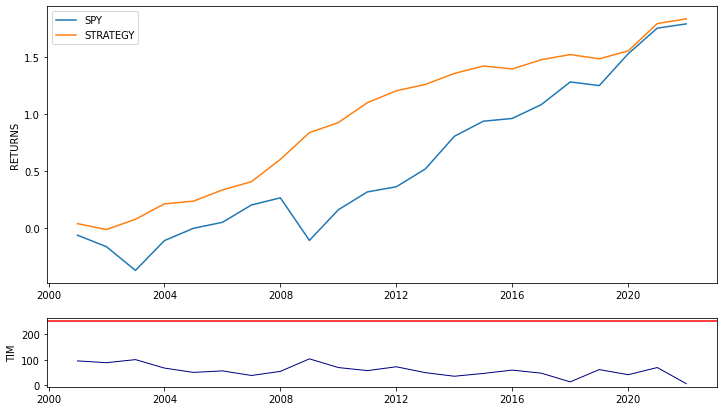

In [54]:
# plot
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[4,1])
ax0 = plt.subplot(gs[0])
ax0.set_ylabel('RETURNS')
plt.plot(avg_tim['spy'].cumsum(), label='SPY')
plt.plot(avg_tim['strategy'].cumsum(), label='STRATEGY')
plt.legend()

# time in market
ax1 = plt.subplot(gs[1], sharex=ax0)
ax1.set_ylabel('TIM')
ax1.plot(avg_tim['tim'], color="navy", linewidth=1)
ax1.axhline(252, color='r', linewidth=1.5)
# ax1.axhline(, color='g', linewidth=1.5)

### Example 2

* GO LONG where 50-day SMA > 200-day SMA (catching upward trend)
* GO SHORT where 50-day SMA < 200-day SMA (catching downward trend)